In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

First set a baseline for detection of 5-sigma sources on varying static source density and without re-fitting PSFS.

Note this is for `templateNoNoise=True` and `skyLimited=True` !!!

Note that for better PSF fitting (and more realism), we make sure that `avoidAllOverlaps=0` instead of previous runs which had `avoidAllOverlaps=15`.

In [2]:
n_runs = 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=True, skyLimited=True,
                                             sky=[30., 300.],
                                             avoidAllOverlaps=0.,
                                             n_runs=n_runs, remeasurePsfs=[False, False])

RUNNING: 250
CORES: 4


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   37.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.5min


Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  9.1min


Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 11.2min finished


In [3]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']

tr1 = [tr for tr in testResults1 if tr['result'] is not None]
print len(testResults1), len(tr1)

250 250


In [4]:
TP1 = []; FP1 = []; FN1 = []
for i, tr in enumerate(tr1):    
    FN = {key: tr['result'][key]['FN'] for key in methods}
    FN['n_sources'] = tr['n_sources']
    FN1.append(pd.DataFrame(FN, index=[0]))

    TP = {key: tr['result'][key]['TP'] for key in methods}
    TP['n_sources'] = tr['n_sources']
    TP1.append(pd.DataFrame(TP, index=[0]))

    FP = {key: tr['result'][key]['FP'] for key in methods}
    FP['n_sources'] = tr['n_sources']
    FP1.append(pd.DataFrame(FP, index=[0]))

FN1mn = pd.concat(FN1, axis=0).groupby('n_sources').median()
TP1mn = pd.concat(TP1, axis=0).groupby('n_sources').median()
FP1mn = pd.concat(FP1, axis=0).groupby('n_sources').median()

FN1err = pd.concat(FN1, axis=0).groupby('n_sources').std()
TP1err = pd.concat(TP1, axis=0).groupby('n_sources').std()
FP1err = pd.concat(FP1, axis=0).groupby('n_sources').std()
dit.sizeme(FN1mn.head())

,ALstack,ALstack_decorr,SZOGY,ZOGY
n_sources,,,,
50,32.0,33.5,34.5,33.0
100,33.0,36.5,37.0,36.0
250,34.5,37.5,38.0,36.5
500,35.0,35.5,36.0,35.5
750,35.0,37.0,36.5,36.0


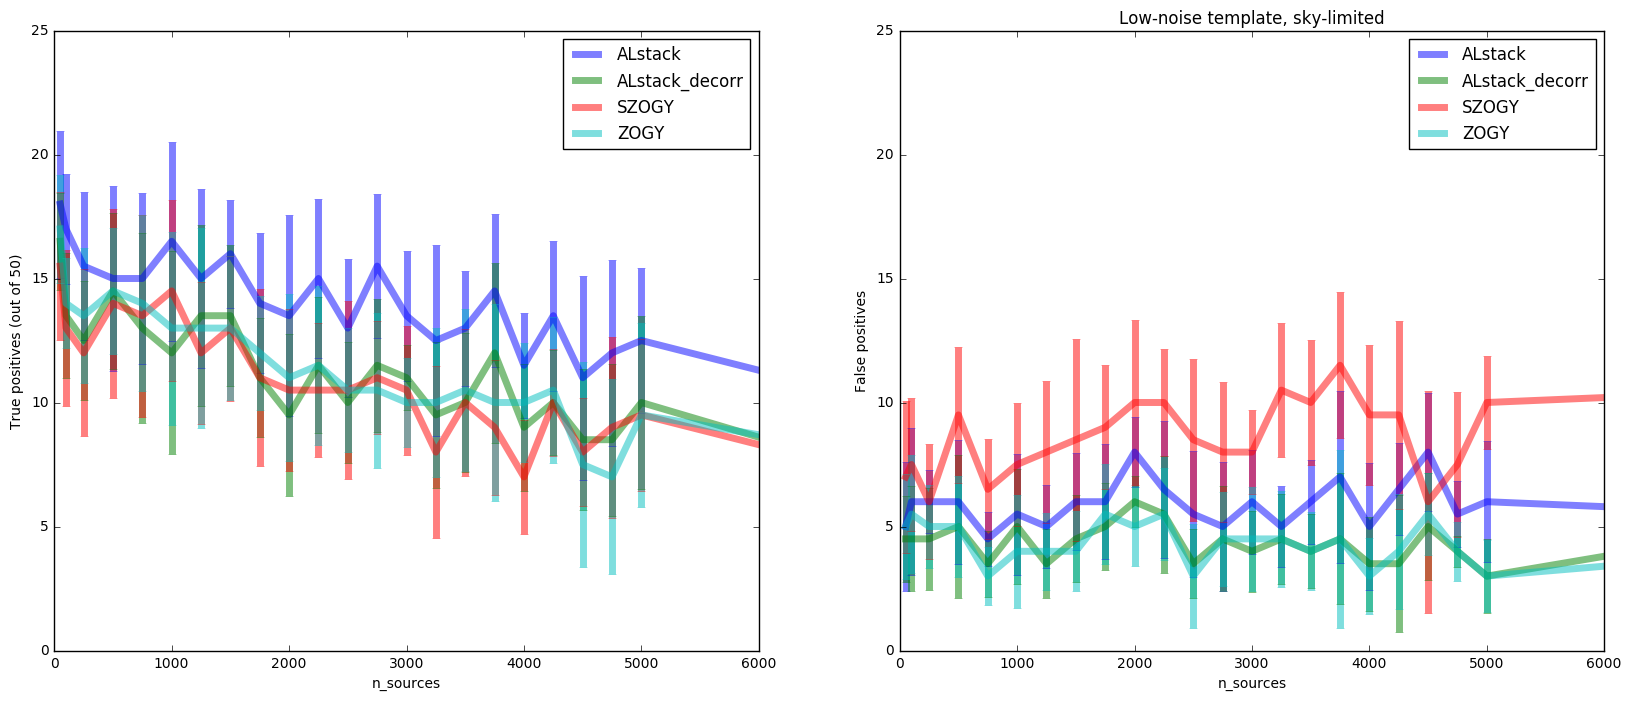

In [5]:
plt.subplots(1, 2, figsize=(20, 8))
ax = plt.subplot(121)
#TP1mn.drop('SZOGY', 1).reset_index().plot(x='n_sources', yerr=TP1err, alpha=0.5, lw=5, ax=ax)
TP1mn.reset_index().plot(x='n_sources', yerr=TP1err, alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 25)
ax = plt.subplot(122)    
#FP1mn.drop('SZOGY', 1).reset_index().plot(x='n_sources', yerr=FP1err, alpha=0.5, lw=5, ax=ax)
FP1mn.reset_index().plot(x='n_sources', yerr=FP1err, alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Low-noise template, sky-limited')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 25);

Now do it after re-fitting the PSF in the science image

In [ ]:
n_runs = 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620., 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=True, skyLimited=True,
                                             sky=[30., 300.],
                                             avoidAllOverlaps=0.,
                                             n_runs=n_runs, remeasurePsfs=[True, True])

RUNNING: 250
CORES: 4

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE1: 'NoneType' object has no attribute 'shape'

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE1: 'NoneType' object has no attribute 'shape'

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw:

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   51.0s



  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE1: 'NoneType' object has no attribute 'shape'

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE2: 'NoneType' object has no attribute 'shape'


In [20]:
dit.dumpObjects((testResults1, testResults2), "tmp5_pkl")

In [7]:
testResults1, testResults2 = dit.loadObjects('tmp5_pkl')

In [ ]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']

tr2 = [tr for tr in testResults2 if tr['result'] is not None]
print len(testResults2), len(tr2)

In [ ]:
TP1 = []; FP1 = []; FN1 = []
for i, tr in enumerate(tr2):    
    rms = tr['psfInfo']['normedRms2']
    if rms is None:
        rms = np.nan

    FN = {key: tr['result'][key]['FN'] for key in methods}
    FN['n_sources'] = tr['n_sources']
    FN['normedRms2'] = rms
    FN1.append(pd.DataFrame(FN, index=[0]))

    TP = {key: tr['result'][key]['TP'] for key in methods}
    TP['n_sources'] = tr['n_sources']
    TP['normedRms2'] = rms
    TP1.append(pd.DataFrame(TP, index=[0]))

    FP = {key: tr['result'][key]['FP'] for key in methods}
    FP['n_sources'] = tr['n_sources']
    FP['normedRms2'] = rms
    FP1.append(pd.DataFrame(FP, index=[0]))

FN1mn = pd.concat(FN1, axis=0).groupby('n_sources').median()
TP1mn = pd.concat(TP1, axis=0).groupby('n_sources').median()
FP1mn = pd.concat(FP1, axis=0).groupby('n_sources').median()

FN1err = pd.concat(FN1, axis=0).groupby('n_sources').std()
TP1err = pd.concat(TP1, axis=0).groupby('n_sources').std()
FP1err = pd.concat(FP1, axis=0).groupby('n_sources').std()
dit.sizeme(FN1mn.head())

In [ ]:
plt.subplots(3, 2, figsize=(20, 16))
ax = plt.subplot(221)    
TP1mn.drop(['normedRms2'], 1).reset_index().plot(x='n_sources', yerr=TP1err.drop('normedRms2', 1), 
                                               alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 25)
ax = plt.subplot(222)    
FP1mn.drop(['normedRms2'], 1).reset_index().plot(x='n_sources', yerr=FP1err.drop('normedRms2', 1),
                                               alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Low-noise template, sky-limited')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 25)

ax = plt.subplot(223)    
FP1mn[['normedRms2']].reset_index().plot(x='n_sources', alpha=0.5, lw=5, ax=ax)
ax.set_xlim(0, 6000)
ax.set_ylabel('PSF measurement error (RMS)')

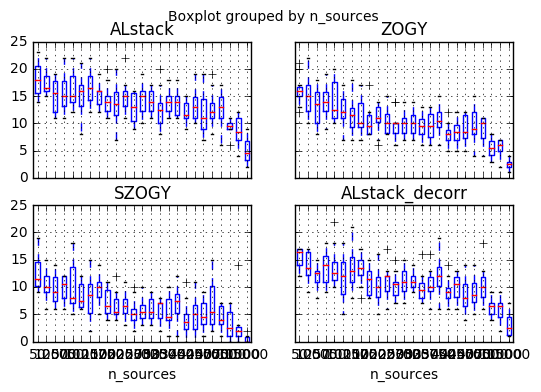

In [84]:
TP1a = pd.concat(TP1, axis=0).drop(['normedRms2'], 1)
TP1a.boxplot(column=methods, by='n_sources');